In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "/content/drive/MyDrive/finance_sales_project/cleaned_sales_data.csv"
)

df.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year,profit_calc,month
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,16185.0,1
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014,13210.0,1
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06,6,January,2014,10890.0,1
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06,6,January,2014,4440.0,1
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06,6,January,2014,12350.0,1


In [12]:
df[["sales", "profit", "units_sold"]].agg(["sum", "mean"])

,sales,profit,units_sold
sum,1.187264e+08,1.844834e+07,1.125806e+06
mean,1.696091e+05,2.654438e+04,1.608294e+03


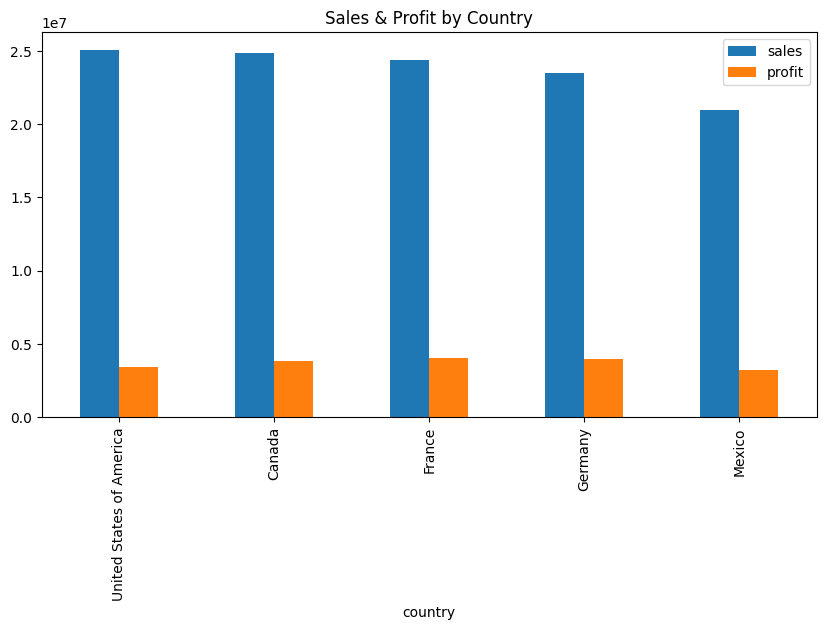

In [13]:
#countrywise profit
country_summary = df.groupby("country")[["sales", "profit"]].sum().sort_values("sales", ascending=False)
country_summary.plot(kind="bar", figsize=(10,5))
plt.title("Sales & Profit by Country")
plt.show()

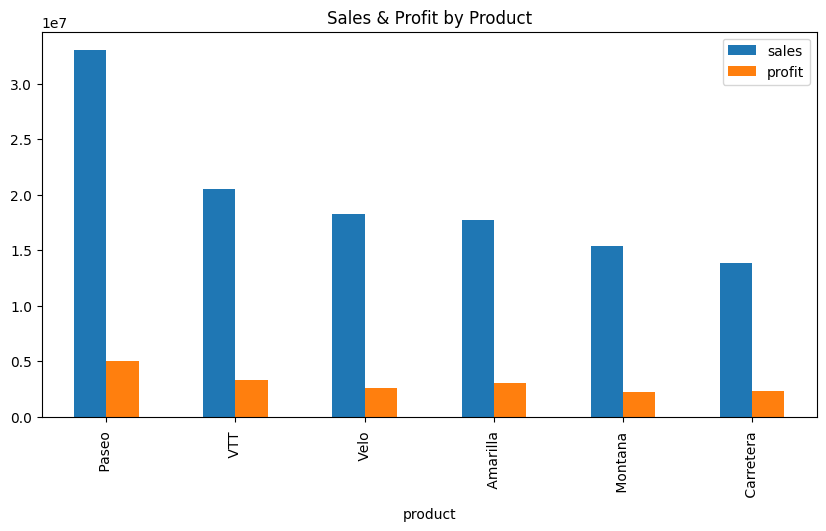

In [14]:
#product-wise profit
product_summary = df.groupby("product")[["sales", "profit"]].sum().sort_values("sales", ascending=False)
product_summary.plot(kind="bar", figsize=(10,5))
plt.title("Sales & Profit by Product")
plt.show()

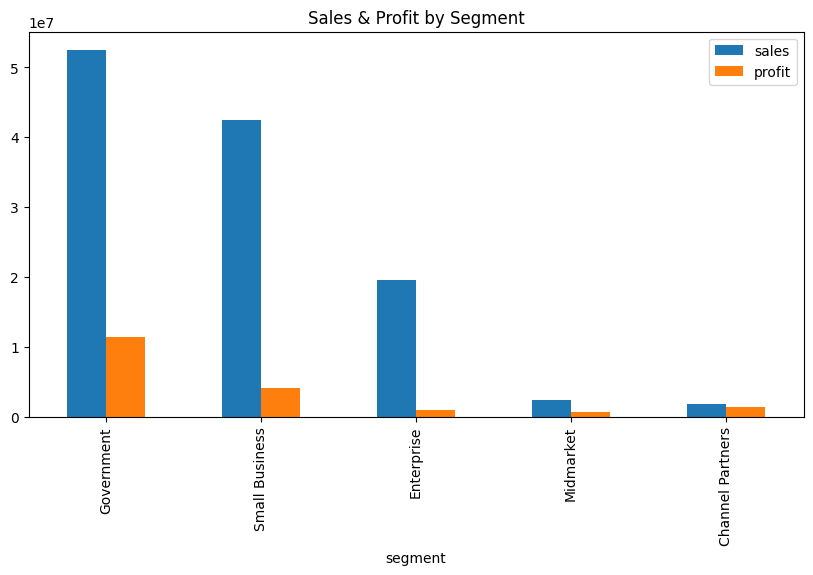

In [15]:
#segment-wise profit
segment_summary = df.groupby("segment")[["sales", "profit"]].sum().sort_values("sales", ascending=False)
segment_summary.plot(kind="bar", figsize=(10,5))
plt.title("Sales & Profit by Segment")
plt.show()

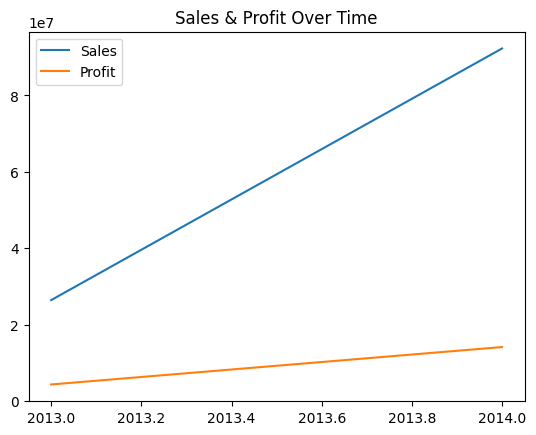

In [16]:
yearly = df.groupby("year")[["sales", "profit"]].sum()

plt.plot(yearly.index, yearly["sales"], label="Sales")
plt.plot(yearly.index, yearly["profit"], label="Profit")
plt.legend()
plt.title("Sales & Profit Over Time")
plt.show()